# Projet Algorithmique avancée

![alt Représentation graphique](https://cdn.discordapp.com/attachments/980738951117676546/990991843267338250/unknown.png)

## Sommaire

1. Contexte
2. Version
3. Reformulation
    1. Complexité théorique
        1. Démonstration
        2. Solution
    2. Métaheuristiques
        1. Plus proche voisin
        2. Colonie de fourmis
        3. Génétique
    3. Comparaison
4. Bibliographie

## Contexte :

Nous sommes une équipe de 4 personnes appartenant à **CesiCDP**. L’ADEME (Agence de l’Environnement et de la maîtrise de l’Énergie) nous a sollicité pour proposer une nouvelle solution afin d'optimiser la mobilité de personnes et de marchandises entre différentes villes. 

Nous avons décidé d’orienter notre étude sur la gestion de tournées de livraison. Pour cela, nous aurons à prendre en compte différents facteurs comme le trafic, les horaires. Tout cela sera résumé par un problème algorithmique issu de la recherche opérationnelle.

Le but est de développer un algorithme qui permettra de trouver un chemin le plus **optimal** possible.

## Version

Langage de programmation imposé : **Python**

Algorithme permettant de gérer les tournées de livraison de manière optimale. Il doit être capable de gérer des instances de taille importante (plusieurs milliers de villes). Il doit permettre de trouver le chemin optimal afin d'optimiser le temps de la tournée et le nombre de kilomètres. De plus, nous avons décidé d'ajouter des contraintes :
- De **trafic** (il peut y avoir des bouchons)

## Reformulation

### Complexité théorique

Notre problème correspond à un problème du VRP (Vehicule Routing Problem), ou en français problème de tournée de véhicule. Le problème du VRP est un problème appartenant à la classe des problèmes du voyageur de commerce. Ce problème est NP-complet, c'est-à-dire qu'il ne peut être résolu exactement dans des temps concevables.

#### Démonstration

*Il est important de préciser que comme le problème de tournée de véhicules est un dérivé du problème du voyageur de commerce, il possède la même complexité que celui-ci. Donc démontrer que le problème du voyageur de commerce est NP-Complet revient à démontrer que le problème de la tournée de véhicule est NP-Complet.*

Le problème du voyageur de commerce définit $n$ villes et les distances entre chaque ville. Le but est de trouver le chemin de longueur minimale passant par tous les points *une seule fois* et reviens au point de départ. Une instance étant un **graphe complet**, on a : 
<br/><br/>
avec $V$ un ensemble de sommets, $A$ un ensemble d'arêtes et $\omega$ une fonction de coût sur les arcs. On cherche donc un **cycle hamiltonien**.

Pour un nombre $n$ de villes, il existe $n!$ solutions possibles. Comme le point de départ ne change pas, on peut écrire la chose suivante représentant le nombre de chemins différents :



Les chemins pouvant être parcourus dans les **deux sens** (graphe *non-orienté*) et ces chemins ont la même longueur, on peut alors diviser le total par *deux*, ce qui donne :

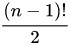

À titre d'exemple, on peut citer si $n=8$ on aura 2520 possibilités et si $n=20$ on aura 6,082 × 10<sup>16</sup> possibilités. 

On peut alors analyser la complexité temporelle de cet algorithme à $O(n!)$.

D'une autre manière, Held et Karp ont montré que le problème pourrait être résolu en $O(n^2 2^n)$

#### Solution

Afin de résoudre des problèmes NP-Complets, des algorithmes ont été développés : les métaheuristiques. 

> Une métaheuristique est un algorithme d’optimisation visant à résoudre des problèmes d’optimisation difficile pour lesquels on ne connaît pas de méthode classique plus efficace.

Grâce à ces métaheuristiques, on va pouvoir trouver une solution approchée dans des temps de traitements corrects. Il existe beaucoup de métaheuristiques différentes, permettant des approches différentes du problème et des méthodes de résolution différentes. Nous nous sommes concentrés sur 3 de ces métaheuristiques : 
- Plus proche voisin
- Colonie de fourmis
- Génétique


### Métaheuristiques 

#### Plus proche voisin

Cette méthode est très simple à mettre en place et à comprendre. En effet, on a besoin d'un nombre *k* définissant un cercle autour du point et permettant de voir dans un **périmètre défini** qui est voisin de ce point. En jouant avec la valeur de $k$, on peut trouver quel est le point le plus proche de notre point de recherche. On attribue alors une classe en fonction du voisin pour permettre de regrouper les voisins.

<img style="margin: 40px auto;" src="https://miro.medium.com/max/810/1*0Pqqx6wGDfFm_7GLebg2Hw.png" alt="Schéma plus proche voisin" width="300"/>


#### Colonie de fourmis

Les algorithmes de colonies de fourmis sont inspirés du comportement des fourmis. 

- Une fourmi *eclaireuse* parcours au hasard le territoire autour de la colonie. 
- Si quelque chose est trouvé, elle rentre au nid en suivant les **phéromones** qu'elle a laissées. 
- Ces phéromones étant attractives, les fourmis à proximité vont suivre cet itinéraire de façon plus ou moins directe, elles renforceront ainsi la puissance des phéromones présentes. Si deux *chemins* mènent au même endroit le plus court sera privilégiée, renforçant les phéromones sur ce chemin et poussant les autres fourmis à le suivre plutôt qu'un autre. 
- Les *chemins* les plus longs finissent par disparaîtres et à terme la piste la plus courte est la seule présente.

<img style="margin: 40px auto;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/Aco_branches.svg/330px-Aco_branches.svg.png" alt="Schéma colonie de fourmis" width="300"/>


#### Génétique

Un algorithme génétique est un algorithme appartenant à la famille des algorithmes évolutionnistes. Le but de ces algorithmes est de trouver des solutions approchées pour des problèmes d'optimisations. Ils permettent de fournir une réponse en un temps acceptable lorsque l'on ne connaît pas de méthodes de résolution plus efficaces.

On retrouve la notion de **sélection naturelle** dans ces algorithmes. C'est-à-dire qu'à la fin d'une *génération*, on va garder seulement les *individus* possédant les *valeurs d'aptitudes* les plus hautes. On aura alors une nouvelle génération dans laquelle seuls les individus les plus intéressants auront survécu et fusionnés. On pourra alors, au fur et à mesure des générations, avoir une précision de plus en plus précise.

<img style="margin-top: 40px;" src="https://khayyam.developpez.com/articles/algo/genetic/images/schema_gen.gif" alt="schéma algo génétique" width="300"/>

### Comparaison

Notre problème va compter des instances **importantes** (plusieurs milliers de villes) et, comme précisé plus haut, nous allons avoir un nombre très important de solutions. Ce nombre de solutions, fait partie d'un ensemble de solutions *envisageables* pour la résolution de notre problème. Pour exploiter ces solutions, nous avons décidé d'utiliser des métaheuristiques par **population** plutôt que par trajectoire. Les méthodes par trajectoire se basant sur le **voisinage**, l'implementation nous semblait plus complexe et coûteuse en temps et nous préférons explorer un ensemble important de solution plutôt qu'une seule que nous aurions faite évoluer.

Bien entendu, il existe une multitude de métaheuristiques par population. Parmi ces algorithmes, on retrouve la famille des **algorithmes évolutionnistes**. Ceux-ci s'inspirent de la théorie de l'évolution pour résoudre des problèmes divers dont des problèmes d'optimisations. On prend un ensemble de solutions et on va rechercher les meilleures solutions parmi cet ensemble. On peut dire que ces algorithmes sont **stochastiques** car ils itèrent sur des processus aléatoires, ils incorporent donc une partie d'aléatoire. Si un seuil est défini (nombre d'itération ou temps d'exécution), il se peut que la solution la plus optimale soit *ignorée* car la recherche se serait arrêtée avant. Néanmoins, on trouvera une solution **correcte** et **optimisée** dans un temps *acceptable*. L'algorithme génétique fait partie de cette catégorie.

Concernant l'algorithme de colonie de fourmis, nous avons décidé de l'implémenter pour plusieurs raisons. C'est un algorithme par population où tous les individus partagent un **savoir commun**, cette notion est primordiale pour le bon fonctionnement de l'algorithme. Ce savoir commun permet de trouver les résultats les plus *optimisés possible*. Il est également très efficace sur les instances de tailles réduites. Il n'y a pas de notion de générations de populations, les itérations de l'algorithme correspondent aux déplacements des fourmis. Ce mode d'itérations va aussi privilégier les plus courts chemins puisque les fourmis auront besoin de moins d'itérations pour en arriver au bout.

## Bibliographie

Sources :
- https://tel.archives-ouvertes.fr/tel-00966428/document
- https://tel.archives-ouvertes.fr/tel-00502988/document
- https://tel.archives-ouvertes.fr/tel-01688288/document
- http://www.numdam.org/article/RO_1990__24_3_217_0.pdf
- http://indexation.univ-fcomte.fr/nuxeo/site/esupversions/d5248833-8393-46e1-8710-f5e605e99d86
- https://publications.polymtl.ca/1603/1/2014_AlexandreLeuliet.pdf